# Basic classification: Classify images of Waste Material

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from importlib import import_module

print(tf.__version__)

1.14.0


## Import the Waste Material 100 dataset

In [2]:
DATADIR = '/home/yanxiang.zyx/associative_deep_clustering/semisup/data/npy/'

dataset_tools = import_module('tools.material')

train_images, test_images, train_labels,  test_labels = dataset_tools.get_data()

# train_labels = train_labels - 1
# test_labels = test_labels - 1

In [3]:
class_names = ['Cardboard', 'Pamphlet', 'Empty', 'Plastic Foil', 'Shredded Paper']

NUM_LABELS = dataset_tools.NUM_LABELS
IMAGE_SHAPE = dataset_tools.IMAGE_SHAPE

In [4]:
train_images.shape


(350, 227, 227, 3)

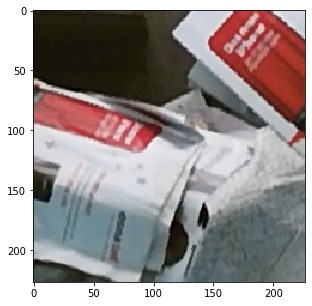

In [5]:
plt.figure(figsize=(5, 5))
plt.imshow(train_images[10])
plt.show()

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

In [7]:
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_labels[i]])
# plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [15]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=IMAGE_SHAPE, kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(1024, input_shape=(IMAGE_SHAPE[0]*IMAGE_SHAPE[1]*IMAGE_SHAPE[2],)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
model.add(BatchNormalization())


# 2nd Fully Connected Layer
model.add(Dense(512))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
model.add(BatchNormalization())

# 3rd Fully Connected Layer
# model.add(Dense(1000))
# model.add(Activation('relu'))
# Add Dropout
# model.add(Dropout(0.4))

# Output Layer
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_25 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_26 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 256)        

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# model.fit(train_images, train_labels, epochs=10)
model.fit(train_images, train_labels, epochs=10, verbose=1, \
validation_split=0.2, shuffle=True)

Train on 280 samples, validate on 70 samples
Epoch 1/10


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument: Can not squeeze dim[1], expected a dimension of 1, got 5
	 [[{{node metrics_2/acc/Squeeze}}]]
	 [[loss_1/mul/_745]]
  (1) Invalid argument: Can not squeeze dim[1], expected a dimension of 1, got 5
	 [[{{node metrics_2/acc/Squeeze}}]]
0 successful operations.
0 derived errors ignored.

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [45]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

150/150 - 0s - loss: 1.6268 - acc: 0.1533

Test accuracy: 0.15333334


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

## Make predictions

With the model trained, you can use it to make predictions about some images.

In [17]:
predictions = model.predict(test_images)

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(NUM_LABELS))
  plt.yticks([])
  thisplot = plt.bar(range(NUM_LABELS), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

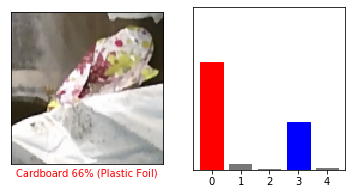

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

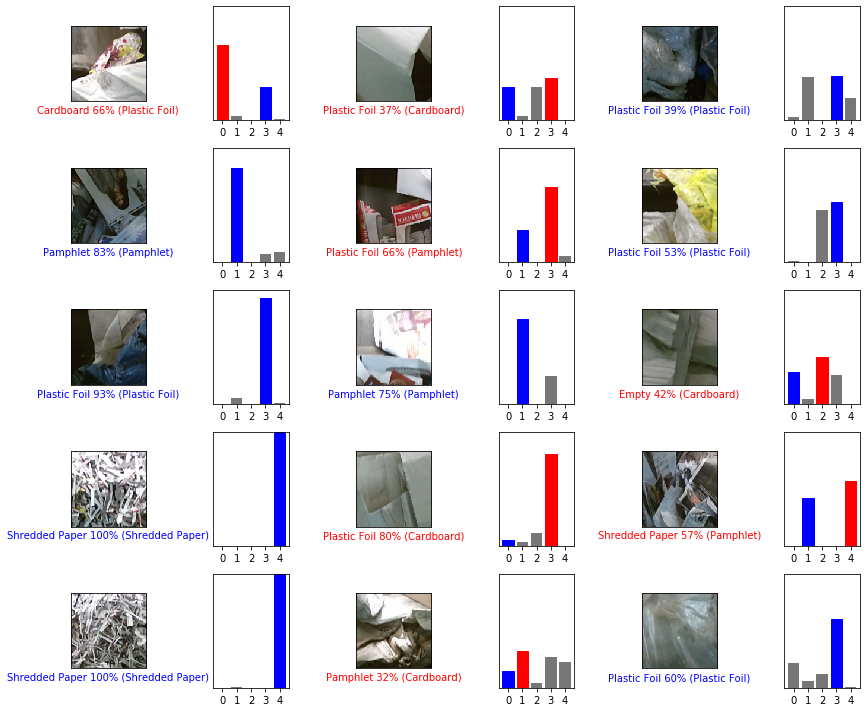

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finally, use the trained model to make a prediction about a single image.

In [64]:
# Add the image to a batch where it's the only member.
img = test_images[1]
img = (np.expand_dims(img,0))
print(img.shape)

(1, 32, 32, 3)


In [65]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.52303621e-01 1.06937036e-01 7.28486121e-01 1.17277948e-03
  1.11004459e-02 1.39957859e-15 3.27482190e-18 1.91189998e-18
  2.12026409e-18 5.12261047e-15]]


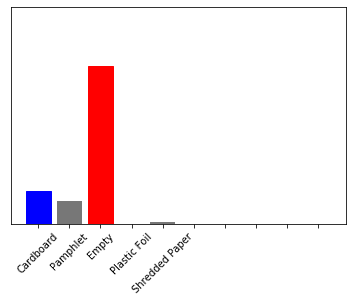

In [66]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [67]:
np.argmax(predictions_single[0])

2